# Introduction

Multiple Regression mengenai penjualan obat bulanan (classified to the following Anatomical Therapeutic Chemical (ATC) Classification System)<br>

Kode: <br>
M01AB: Anti-Inflamasi dan Anti-Reumatic, Acetic Acis <br>
M01AE: Anti-Inflamasi dan Anti-Reumatic, Propionic Acid <br>
N02BA: Analgesic dan Antipretic, Salicilid Acid <br>
N02BE/B: Analgesic dan Antipretic,Pyrazolones and Anilides <br>
NO5B: Psycholeptics drugs, Anxiolytic drugs <br>
N05C: Psycholeptics drugs, Hypnotics and sedatives drugs <br>
R03: Drugs for obstructive airway diseases <br>
RO6: Antihistamines for systemic use <br>

<br>
TUJUANNYA ADALAH UNTUK MENGETAHUI PENGARUH SETIAP OBAT PADA RATA-RATA PENJUALAN BULANAN DALAM 6 TAHUN TERAKHIR

# Import Library & Load Dataset

In [1]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
pharma = pd.read_csv("Pharma_Dataset.csv")
pharma.head(10)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Average_Sales
0,1/31/2014,127.69,99.090,152.100,878.030,354.0,50,112.0,48.2,227.638750
1,2/28/2014,133.32,126.050,177.000,1001.900,347.0,31,122.0,36.2,246.808750
2,3/31/2014,137.44,92.950,147.655,779.275,232.0,20,112.0,85.4,200.840000
3,4/30/2014,113.10,89.475,130.900,698.500,209.0,18,97.0,73.7,178.709375
4,5/31/2014,101.79,119.933,132.100,628.780,270.0,23,107.0,123.7,188.287875
5,6/30/2014,112.07,94.710,122.900,548.225,323.0,23,57.0,109.3,173.775625
6,7/31/2014,117.06,95.010,129.300,491.900,348.0,21,61.0,69.1,166.546250
7,8/31/2014,134.79,99.780,123.800,583.850,420.0,29,37.0,70.8,187.377500
8,9/30/2014,108.78,109.094,122.100,887.820,399.0,14,115.0,58.8,226.824250
9,10/31/2014,154.75,185.241,191.600,1856.815,472.0,30,182.0,74.5,393.363250


In [3]:
pharma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datum          70 non-null     object 
 1   M01AB          70 non-null     float64
 2   M01AE          70 non-null     float64
 3   N02BA          70 non-null     float64
 4   N02BE          70 non-null     float64
 5   N05B           70 non-null     float64
 6   N05C           70 non-null     int64  
 7   R03            70 non-null     float64
 8   R06            70 non-null     float64
 9   Average_Sales  70 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 5.6+ KB


# EDA (Exploratory Data Analysis)

1. Data Distribution <br>
2. Feature correlation <br>

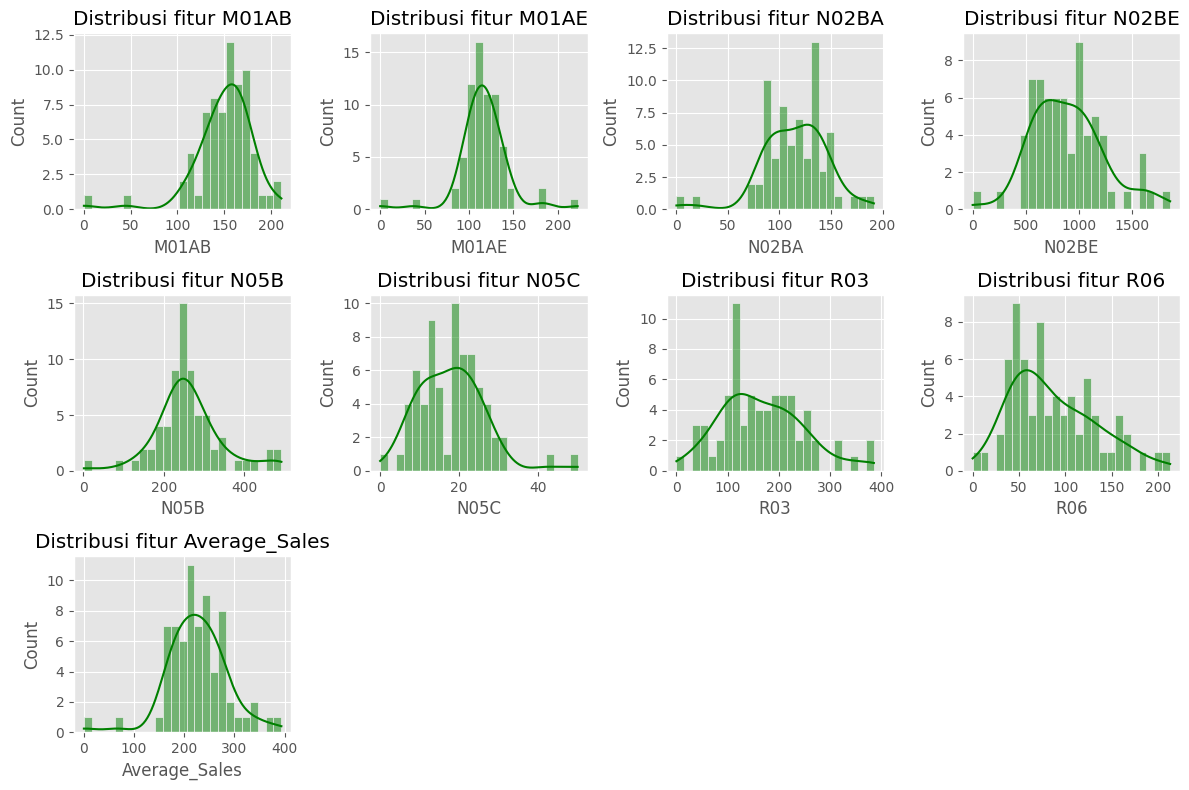

In [4]:
# CHECK SEBARAN DATA
num_feature = pharma.select_dtypes(include=[np.number])
for i, column in enumerate(num_feature.columns, 1):
  plt.subplot(3,4,i)
  sns.histplot(pharma[column], bins=25, kde=True, color='green')
  plt.title(f"Distribusi fitur {column}")
plt.tight_layout()
plt.show()

Menurut hasil visualisasi tiap fitur, hampir semua fitur numerik memiliki persebaran data yang normal (lonceng)<br>

Hanya ada beberapa fitur yang terlihat skew kiri. Hal ini menunjukkan beberapa fitur yang tidak banyak terjual (NO5C, R03, R06). 3 fitur ini harus dicek detail dengan metode visualisasi korelasi untuk mengetahui kontribusinya pada presentase keseluruhan penjualan obat.

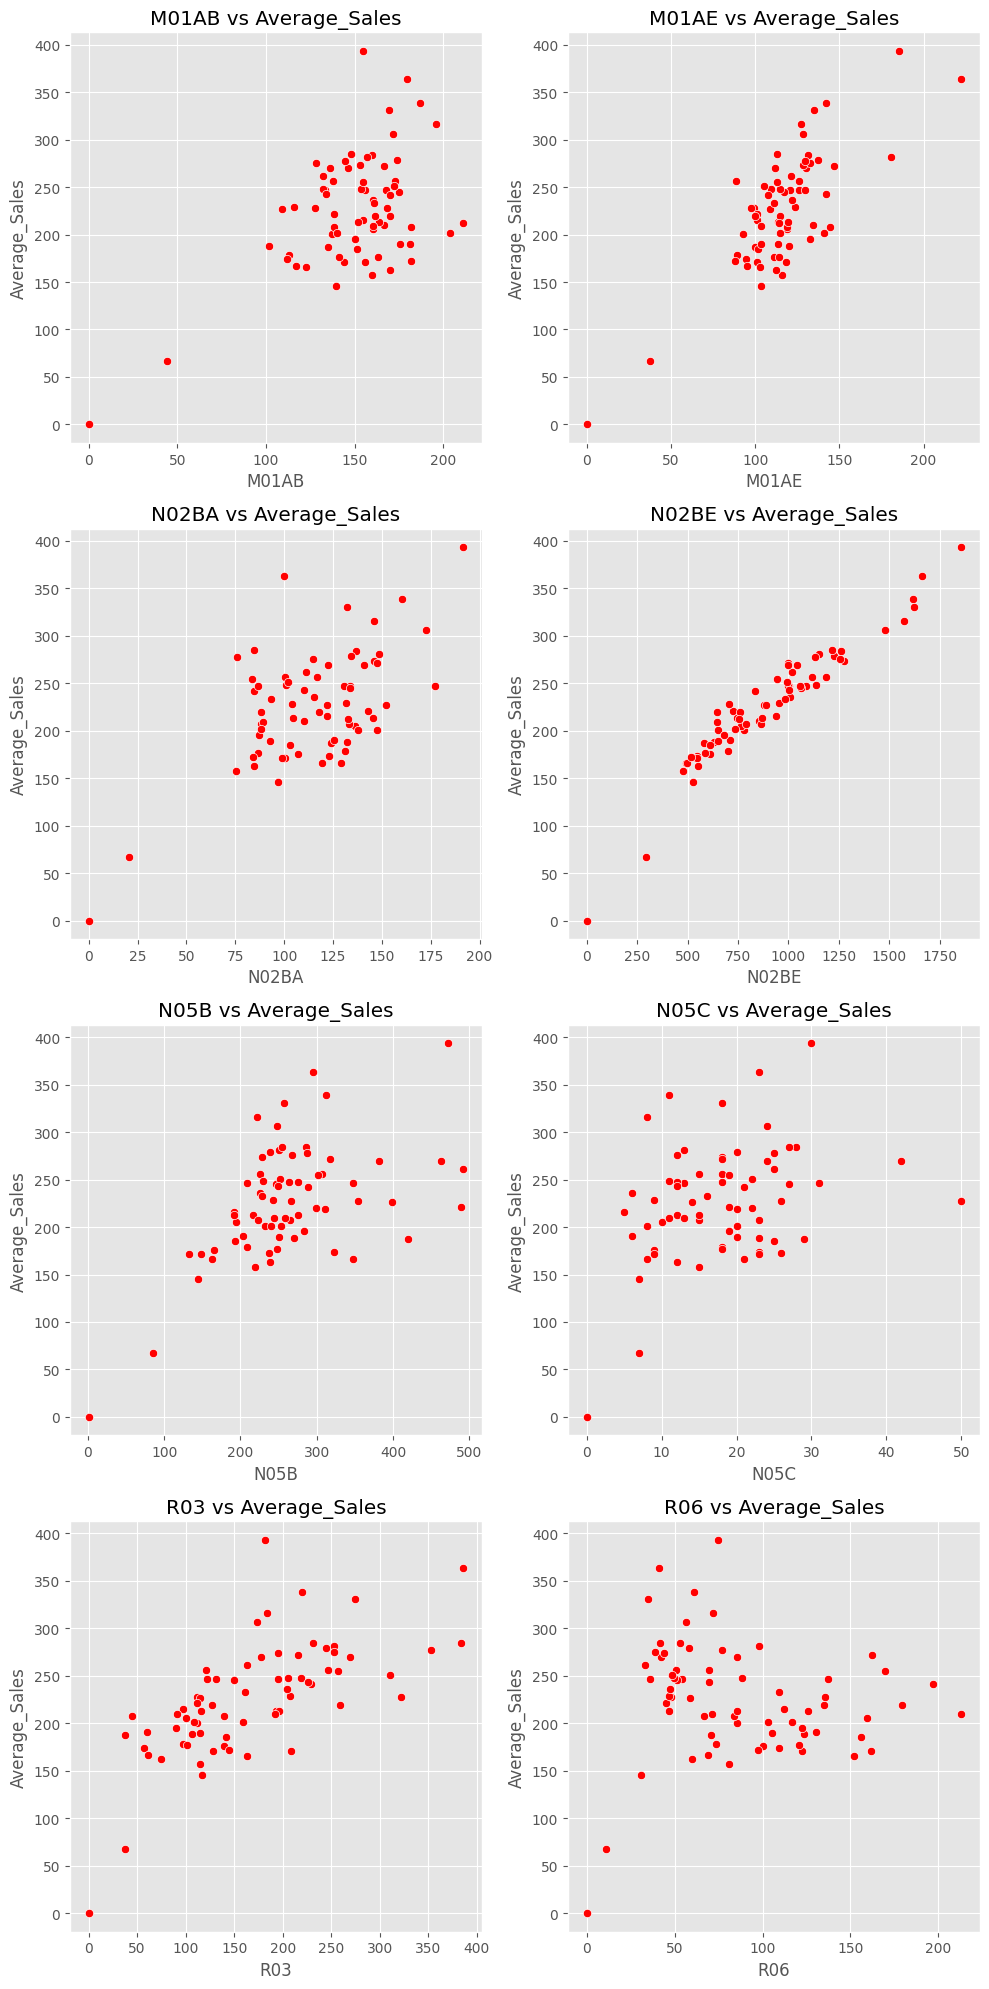

In [11]:
# CHECK KORELASI ATARA FITUR DAN TARGET
x_vars=['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']
y_var ='Average_Sales'

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 20))  # Ukuran besar dan 2 baris
axes = axes.flatten()  # Ubah menjadi 1D array untuk loop

for i, var in enumerate(x_vars):
    sns.scatterplot(x=pharma[var], y=pharma[y_var], ax=axes[i], color='red')
    axes[i].set_title(f'{var} vs {y_var}')

plt.tight_layout()
plt.show()

Dari analisis korelasi di atas: <br>

korelasi N02BE dengan Dependen Fitur bagus (linear) <br>

Sementara untuk yang lainnya terlihat berantakan dan menyebar

<Axes: >

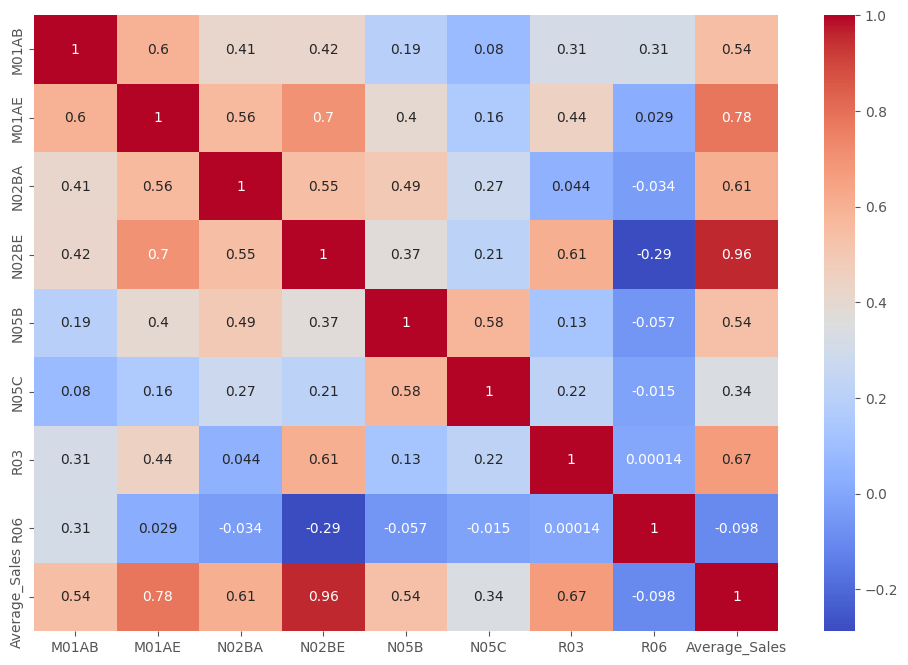

In [13]:
# KORELASI ANTARFITUR
pharma_num = pharma.select_dtypes(include=[np.number])
sns.heatmap(pharma_num.corr(), annot=True, cmap='coolwarm')

Diurutkan tingkat korelasi fitur dengan rata-rata penjualan: <br>

1. NO2BE
2. M01AE
3. R03
4. N02BA
5. M01AB
6. N05B
7. N05C
8. R06

In [14]:
# DROP FITUR TIDAK DIBUTUHKAN (datum)
pharma = pharma.drop(columns = ['datum'])
pharma.head(10)

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Average_Sales
0,127.69,99.090,152.100,878.030,354.0,50,112.0,48.2,227.638750
1,133.32,126.050,177.000,1001.900,347.0,31,122.0,36.2,246.808750
2,137.44,92.950,147.655,779.275,232.0,20,112.0,85.4,200.840000
3,113.10,89.475,130.900,698.500,209.0,18,97.0,73.7,178.709375
4,101.79,119.933,132.100,628.780,270.0,23,107.0,123.7,188.287875
5,112.07,94.710,122.900,548.225,323.0,23,57.0,109.3,173.775625
6,117.06,95.010,129.300,491.900,348.0,21,61.0,69.1,166.546250
7,134.79,99.780,123.800,583.850,420.0,29,37.0,70.8,187.377500
8,108.78,109.094,122.100,887.820,399.0,14,115.0,58.8,226.824250
9,154.75,185.241,191.600,1856.815,472.0,30,182.0,74.5,393.363250


# FEATURE SELECTION USING ADJUSTED R2 SQUARED

In [17]:
# Check R_Squared antar semua fitur dengan target
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

X = pharma[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y = pharma[['Average_Sales']]

lm0 = LinearRegression()
lm0.fit(X,y)
lm0_pred = lm0.predict(X)

r_squared = r2_score(y, lm0_pred)
adjusted_r_squared = 1 - (1-r_squared*(len(y)-1)/(len(y)-X.shape[1]-1))
print('Adjusted R^2: ', adjusted_r_squared)

Adjusted R^2:  1.1311475409836065


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Target
y = pharma[['Average_Sales']]

# Fitur tetap
base_feature = 'N02BE'

# Fitur lain yang akan dipasangkan
features = ['M01AB', 'M01AE', 'N02BA', 'N05B', 'N05C', 'R03', 'R06']  # Kecuali N02BE sendiri

# Looping per fitur
for feature in features:
    X = pharma[[base_feature, feature]]  # Kombinasi dua fitur
    model = LinearRegression()
    model.fit(X, y)
    pred = model.predict(X)

    r2 = r2_score(y, pred)
    n = len(y)
    k = X.shape[1]  # Selalu 2
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    print(f'Features: [{base_feature}, {feature}]')
    print(f'R^2       : {r2:.4f}')
    print(f'Adj. R^2  : {adjusted_r2:.4f}\n')


Features: [N02BE, M01AB]
R^2       : 0.9360
Adj. R^2  : 0.9341

Features: [N02BE, M01AE]
R^2       : 0.9361
Adj. R^2  : 0.9342

Features: [N02BE, N02BA]
R^2       : 0.9223
Adj. R^2  : 0.9200

Features: [N02BE, N05B]
R^2       : 0.9487
Adj. R^2  : 0.9472

Features: [N02BE, N05C]
R^2       : 0.9314
Adj. R^2  : 0.9294

Features: [N02BE, R03]
R^2       : 0.9261
Adj. R^2  : 0.9239

Features: [N02BE, R06]
R^2       : 0.9460
Adj. R^2  : 0.9444



# MODEL EVALUATION

Mengukur akurasi dan nilai eror

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Menggunakan fitur TV, Radio, dan Koran
X = pharma[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y = pharma['Average_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
lm0 = LinearRegression()
lm0.fit(X_train,y_train)
lm0_pred = lm0.predict(X_test)

print('RMSE: ', np.sqrt(mean_squared_error(y_test, lm0_pred)))
print('Adjusted R^2: ', 1 - (1-r2_score(y_test, lm0_pred))*(len(y)-1)/(len(y)-X.shape[1]-1))

RMSE:  6.76591448053844e-14
Adjusted R^2:  1.0


In [35]:
# Target
X = pharma[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y = pharma[['Average_Sales']]

# Fitur tetap
base_feature = 'N02BE'

# Fitur lain yang akan dipasangkan
features = ['M01AB', 'M01AE', 'N02BA', 'N05B', 'N05C', 'R03', 'R06']  # Kecuali N02BE sendiri

# Looping per fitur
for feature in features:
    X = pharma[[base_feature, feature]]  # Kombinasi dua fitur
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
    model = LinearRegression()
    lm0.fit(X_train,y_train)
    lm0_pred = lm0.predict(X_test)

    r2 = r2_score(y, pred)
    n = len(y)
    k = X.shape[1]
    adjusted_r2 = 1 - (1-r2_score(y_test, lm0_pred))*(len(y)-1)/(len(y)-X.shape[1]-1)
    mse = np.sqrt(mean_squared_error(y_test, lm0_pred))

    print(f'Features  : [{base_feature}, {feature}]')
    print(f'R^2       : {r2:.4f}')
    print(f'Adj. R^2  : {adjusted_r2:.4f}\n')
    print(f'RMSE       : {mse}\n')

Features  : [N02BE, M01AB]
R^2       : 0.9460
Adj. R^2  : 0.9409

RMSE       : 18.44788414227441

Features  : [N02BE, M01AE]
R^2       : 0.9460
Adj. R^2  : 0.9476

RMSE       : 17.358040982108093

Features  : [N02BE, N02BA]
R^2       : 0.9460
Adj. R^2  : 0.9153

RMSE       : 22.07184836598656

Features  : [N02BE, N05B]
R^2       : 0.9460
Adj. R^2  : 0.9385

RMSE       : 18.811859775902388

Features  : [N02BE, N05C]
R^2       : 0.9460
Adj. R^2  : 0.9208

RMSE       : 21.34617698354471

Features  : [N02BE, R03]
R^2       : 0.9460
Adj. R^2  : 0.9206

RMSE       : 21.378184198076468

Features  : [N02BE, R06]
R^2       : 0.9460
Adj. R^2  : 0.9531

RMSE       : 16.425456491764848



KESIMPULAN: <br>

1. RMSE all features 6.7 dengan Adjs R2 1.0
2. RMSE tertinggi oleh N02BE dan N02BA 22.0 dengan Adjs R2 0.9153
3. RMSE tertinggi oleh N02BE dan R03 21.37 dengan Adjs R2 0.9206
4. RMSE tertinggi oleh N02BE dan N05C 21.34 dengan Adjs R2 0.9208

<br>

CONCLUSSION: <br>
JENIS OBAT YANG BERKONTRIBUSI RENDAH DALAM PENJUALAN (BULANAN) DALAM 6 TAHUN ADALAH:

1. N02BA (Analgesic dan Antipretic, Salicilid Acid)
2. R03 (Drugs for obstructive airway diseases)
3. N05C (Psycholeptics drugs, Hypnotics and sedatives drugs)

<br>
SISANYA BERKONTRIBUSI BESAR DALAM PENJUALAN SELAMA 6 TAHUN (2014 - 2019)